Exercise 1.1: Pick a stock. Get the stock prices for the last 10 years using YFinance package. Calculate monthly returns. Show the average returns, standard deviation, maximum drawdown, and sharp ratio for the chosen stock using the monthly returns (These variables show the performance of your investment if your strategy is buy and hold the stock).

In [1]:
#!pip install yfinance
import datetime as dt
import yfinance as yf
import pandas as pd
from datetime import date
import statistics
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt


ticker_list = {'DIS': 'The Walt Disney Company (DIS)'}

def read_data(ticker_list,
          start=date.today() - relativedelta(years = 10),
          end=date.today()):

  #daily_returns = pd.DataFrame()
  closing_prices = pd.DataFrame()

  for tick in ticker_list:
    stock = yf.Ticker(tick)
    prices = stock.history(start=start, end=end)

    # Change the index to date-only
    prices.index = pd.to_datetime(prices.index.date)

    prices.to_csv(ticker_list[tick] + '.csv') #download daily prices

    opening_prices = prices['Open'] #’Open’ reports adj. open price
    closing_prices[tick] = prices['Close'] #’Close’ reports adj. close price
    #daily_returns[tick] = (closing_prices - opening_prices) / opening_prices
    #daily_returns[tick] = prices['Close'].pct_change()

  return closing_prices

ticker = read_data(ticker_list)
monthly_change = pd.DataFrame()

for i, stock in ticker_list.items():
  bom = ticker.groupby([(ticker.index.year), (ticker.index.month)]).first()
  eom = ticker.groupby([(ticker.index.year), (ticker.index.month)]).last()
  change = (eom-bom)/bom
  monthly_change[stock] = change

#print(monthly_change)

average_return = statistics.mean(monthly_change["The Walt Disney Company (DIS)"])
print("Average return =",average_return)

std_return = statistics.stdev(monthly_change["The Walt Disney Company (DIS)"])
print("Standard deviation =",std_return)

maximum_value = 0
current_value = 1
maximum_drawdown = 0
for i in monthly_change["The Walt Disney Company (DIS)"]:
  maximum_value = max(maximum_value,current_value)
  current_value = current_value*(1 + i)
  drawdown = -min(0,(current_value/maximum_value - 1))
  maximum_drawdown = max(maximum_drawdown,drawdown)
print("Maximum drawdown =",maximum_drawdown)

assumed_annual_IRX = 0.02

for stock in monthly_change: #calculate excess returns
  monthly_change[stock + '_excess'] = monthly_change[stock]-assumed_annual_IRX/12
#print(monthly_change)

#monthly_change = monthly_change[monthly_change['^IRX'].notna()] #remove NA values

avg_monthly_return = statistics.mean(monthly_change['The Walt Disney Company (DIS)_excess'])
sharpe_ratio = avg_monthly_return/std_return
print("Sharpe ratio =",sharpe_ratio)

portfolio = 10000 #starting portfolio value $10000
portfolio_value = [portfolio] #starting portfolio value

for i in range(len(monthly_change)-1): #can't calculate moving average if not enough history (200 days)
  portfolio *= (1+monthly_change['The Walt Disney Company (DIS)'].iloc[i])
  portfolio_value.append(portfolio) #new portfolio value is the amount accrued during the holding period



Average return = 0.002731408525094762
Standard deviation = 0.07979304732400146
Maximum drawdown = 0.6397044545787898
Sharpe ratio = 0.013343792399664683


Exercise 1.2: Apply these rules:

• BUY RULE: Buy when monthly price (close price at the end of the month) > 10-month SMA (simple moving average)

• SELL RULE: Sell and move to cash when monthly price < 10-month SMA

Calculate the average returns, standard deviation, maximum drawdown, and sharp ratio for the chosen stock for this strategy (timing strategy)

In [2]:
ticker_list = {'DIS': 'The Walt Disney Company (DIS)'}

def read_data(ticker_list,
          start=date.today() - relativedelta(years = 10),
          end=date.today()):

  #daily_returns = pd.DataFrame()
  closing_prices = pd.DataFrame()

  for tick in ticker_list:
    stock = yf.Ticker(tick)
    prices = stock.history(start=start, end=end)

    # Change the index to date-only
    prices.index = pd.to_datetime(prices.index.date)

    prices.to_csv(ticker_list[tick] + '.csv') #download daily prices

    closing_prices[tick] = prices['Close'] #’Close’ reports adj. close price

  return closing_prices

ticker = read_data(ticker_list)

monthly_close = pd.DataFrame()

for i, stock in ticker_list.items():
  eom = ticker.groupby([(ticker.index.year), (ticker.index.month)]).last()
  monthly_close[stock] = eom

#print(monthly_close)
ma = 10 #moving average period

portfolio = 10000 #starting portfolio value $10000
portfolio_value_new = [portfolio] #starting portfolio value

for i in range(ma,len(monthly_close)): #can't calculate moving average if not enough history (200 days)
  profit = 0 #holding period profit variable
  for stock in monthly_close:
    mov_avg = statistics.mean(monthly_close[stock][i-ma:i]) #calculate moving average

    investment = portfolio

    current_value = monthly_close[stock].iloc[i] #month's closing price

    if mov_avg < current_value: #if previous day's closing price is greater than moving average invest in stock
      excess_rate = monthly_change[stock].iloc[i]
    else: #if previous day's closing price is less than moving average do not invest in stock
      excess_rate = 0

    profit += investment * (1+excess_rate)

  portfolio = profit
  portfolio_value_new.append(portfolio) #new portfolio value is the amount accrued during the holding period

portfolio_value_new_w_na = portfolio_value_new #insert NA's to beginning to account for first 200 calendar days
i = 1
while i < ma:
  portfolio_value_new_w_na.insert(0,np.nan)
  i += 1

monthly_change_new = []

for i in range(1,len(portfolio_value)):
  change = (portfolio_value[i]-portfolio_value[i-1])/portfolio_value[i-1]
  monthly_change_new.append(change)

average_return = statistics.mean(monthly_change_new)
print("Average return =",average_return)

std_return = statistics.stdev(monthly_change_new)
print("Standard deviation =",std_return)

maximum_value = 0
current_value = 1
maximum_drawdown = 0
for i in monthly_change_new:
  maximum_value = max(maximum_value,current_value)
  current_value = current_value*(1 + i)
  drawdown = -min(0,(current_value/maximum_value - 1))
  maximum_drawdown = max(maximum_drawdown,drawdown)
print("Maximum drawdown =",maximum_drawdown)

assumed_annual_IRX = 0.02

monthly_change_new_excess = []
for i in range(len(monthly_change_new)):
  monthly_change_new_excess.append(monthly_change_new[i]-assumed_annual_IRX/12)

avg_monthly_return = statistics.mean(monthly_change_new)
sharpe_ratio = avg_monthly_return/std_return
print("Sharpe ratio =",sharpe_ratio)

Average return = 0.0027541702628038874
Standard deviation = 0.08012721635975024
Maximum drawdown = 0.63970445457879
Sharpe ratio = 0.03437246903022792


Exercise 1.3: Plot buy and hold return and timing return over the life of the stock.

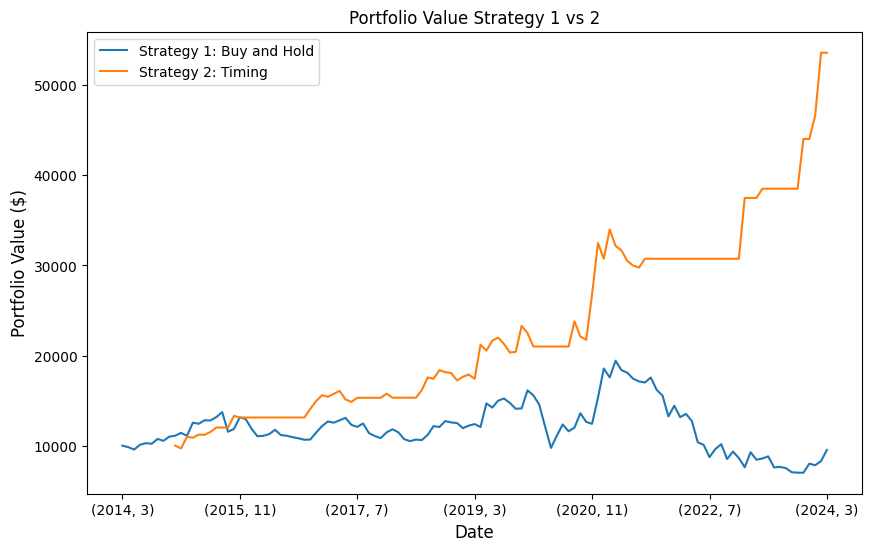

In [3]:
strategy = pd.DataFrame() #empty dataframe to store portfolio 1 value
strategy.index = monthly_close.index #match index to dates
strategy['Strategy 1: Buy and Hold'] = portfolio_value
strategy['Strategy 2: Timing'] = portfolio_value_new_w_na

for portfolio in strategy: #plot portfolio value
  ax = strategy[portfolio].plot(label=portfolio,figsize=(10, 6))
  ax.set_xlabel('Date', fontsize=12)
  ax.set_ylabel('Portfolio Value ($)', fontsize=12)
  ax.legend()
  plt.title("Portfolio Value Strategy 1 vs 2")
plt.show()


Find 1 strategy published in an academic paper. Explain what databases are used and how the
backtesting is performed. What explanations did the paper bring for the prediction?


Exercise 2

Here is a example of academic papers that describe strategies for investing in the stock market:

"Momentum Strategies in the Global Stock Market" by Clifford S. Asness, Tobias J. Moskowitz, and Lasse H. Pedersen.
Database used: The authors used data from the MSCI World Index from 1975 to 2002.

Backtesting: The authors backtested the momentum strategy using a long-short portfolio of high momentum stocks and low momentum stocks. They found that the momentum strategy generated excess returns of 1.5% to 2% per month over the benchmark.

Explanation: The authors explained that the momentum strategy worked because investors tend to underreact to new information and overreact to past information. As a result, stocks with strong recent performance continue to perform well in the near future.
